In [1]:
import numpy as np
X = np.load('data/x_data.npy')
Y = np.load('data/y_data.npy')

In [2]:
tasks = {}

for x,y in zip(X,Y):
    if y in tasks:
        tasks[y]['data'].append(np.array(x[2:]))
        tasks[y]['target'].append(x[0])
    else:
        tasks[y] = {}
        tasks[y]['data'] = [np.array(x[2:])]
        tasks[y]['target'] = [x[0]]


In [3]:
print(tasks['CHEMBL2114881']['target'])

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [4]:
index = 1
top_targets = {}
for key, value in sorted(tasks.items(), key=lambda item: len(item[1]['target']), reverse=True):
    top_targets[key] = {}
    top_targets[key]['data'] = np.array(value['data'])
    top_targets[key]['target'] = np.array(value['target'])

    if index == 100:
        break
    index +=1 

## These are the top 100 targets that will be trained

In [5]:
print(list(top_targets))

['CHEMBL2114881', 'CHEMBL2114714', 'CHEMBL1963941', 'CHEMBL1963883', 'CHEMBL3562022', 'CHEMBL1614063', 'CHEMBL1738498', 'CHEMBL3881499', 'CHEMBL1614432', 'CHEMBL1613885', 'CHEMBL4028923', 'CHEMBL2218781', 'CHEMBL3880337', 'CHEMBL3880339', 'CHEMBL3880338', 'CHEMBL4028921', 'CHEMBL4028924', 'CHEMBL3705123', 'CHEMBL1613799', 'CHEMBL4028922', 'CHEMBL1738424', 'CHEMBL3880340', 'CHEMBL1738407', 'CHEMBL4017550', 'CHEMBL3706327', 'CHEMBL3880341', 'CHEMBL3436039', 'CHEMBL3436040', 'CHEMBL1614547', 'CHEMBL3436041', 'CHEMBL3431934', 'CHEMBL3880334', 'CHEMBL3880335', 'CHEMBL1614423', 'CHEMBL3880344', 'CHEMBL1964096', 'CHEMBL3431931', 'CHEMBL1964000', 'CHEMBL1614199', 'CHEMBL2114818', 'CHEMBL2114719', 'CHEMBL3880342', 'CHEMBL1963965', 'CHEMBL1119333', 'CHEMBL1614549', 'CHEMBL3734174', 'CHEMBL3887033', 'CHEMBL1614359', 'CHEMBL1006579', 'CHEMBL3707950', 'CHEMBL2114737', 'CHEMBL3882758', 'CHEMBL3215171', 'CHEMBL3883019', 'CHEMBL3882757', 'CHEMBL2114791', 'CHEMBL3214986', 'CHEMBL3707758', 'CHEMBL211474

In [6]:
print(top_targets['CHEMBL2114881']['data'])

[[1.0 0.0 0.0 ... 1.0 0.0 1.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]
 [1.0 0.0 0.0 ... 0.0 0.0 0.0]]


In [7]:
from keras.layers import Input, Dense
from keras.models import Model
import time

inputs = Input(shape=(512,))
shared_mlp = Dense(64, activation='relu')(inputs)
shared_mlp = Dense(64, activation='relu')(shared_mlp)

# make a dictionary of models for each task
models_mtl = dict()
print('Creating Sub Models:')
og_start = time.time()
index = 1
for x in top_targets.keys():
    start = time.time()
    personal_layer = Dense(10, activation='relu')(shared_mlp)
    output_layer = Dense(1)(personal_layer)
    model = Model(inputs=inputs, outputs=output_layer)
    model.compile(optimizer='sgd', loss='mean_squared_error')
    models_mtl[x] = model
    end = time.time()
    
    print("Model: ", index, " | Section Time: ", end - start, " | Elapsed Time: ", end - og_start)
    index += 1

Using TensorFlow backend.


Creating Sub Models:
Model:  1  | Section Time:  0.02628779411315918  | Elapsed Time:  0.02678370475769043
Model:  2  | Section Time:  0.025792360305786133  | Elapsed Time:  0.053072214126586914
Model:  3  | Section Time:  0.02678370475769043  | Elapsed Time:  0.08084797859191895
Model:  4  | Section Time:  0.026784420013427734  | Elapsed Time:  0.10812830924987793
Model:  5  | Section Time:  0.02628803253173828  | Elapsed Time:  0.1354081630706787
Model:  6  | Section Time:  0.02678370475769043  | Elapsed Time:  0.1626880168914795
Model:  7  | Section Time:  0.05164027214050293  | Elapsed Time:  0.21532058715820312
Model:  8  | Section Time:  0.032239675521850586  | Elapsed Time:  0.2489917278289795
Model:  9  | Section Time:  0.027280569076538086  | Elapsed Time:  0.27676868438720703
Model:  10  | Section Time:  0.03273653984069824  | Elapsed Time:  0.31049633026123047
Model:  11  | Section Time:  0.02529621124267578  | Elapsed Time:  0.3362882137298584
Model:  12  | Section Time:  0

In [8]:
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train = dict()
y_train = dict()
X_test = dict()
y_test = dict()

#print(top_targets[x][0])

for x in top_targets.keys():
    X_train[x], X_test[x], y_train[x], y_test[x] = train_test_split(top_targets[x]['data'], 
                                                        top_targets[x]['target'], 
                                                        test_size=test_size, 
                                                        random_state=42)


In [9]:
%%time
EPOCHS = 20
from random import shuffle

all_keys = list(top_targets)
for i in range(EPOCHS):
    print('Epoch',i,end=', ')
    shuffle(all_keys)
    for x in all_keys:
        models_mtl[x].fit(X_train[x],y_train[x], verbose=0)

Epoch 0, Epoch 1, Epoch 2, Epoch 3, Epoch 4, Epoch 5, Epoch 6, Epoch 7, Epoch 8, Epoch 9, Epoch 10, Epoch 11, Epoch 12, Epoch 13, Epoch 14, Epoch 15, Epoch 16, Epoch 17, Epoch 18, Epoch 19, Wall time: 2min 15s


## Evaluating the Train-Test Split Data

In [10]:
%%time
y_mtl=[]
yhat_mtl=[]

for x in X_test.keys():
    yhat_mlp = models_mtl[x].predict(X_test[x])

    y_mtl.append(y_test[x].ravel())
    yhat_mtl.append(yhat_mlp.ravel())

Wall time: 47.6 s


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_squared_error, accuracy_score 
from sklearn.metrics import precision_score, mean_squared_log_error

def bland_altman_plot(data1, data2, *args, **kwargs):
    data1     = np.asarray(data1)
    data2     = np.asarray(data2)
    mean      = np.mean([data1, data2], axis=0)
    diff      = data1 - data2                   # Difference between data1 and data2
    md        = np.mean(diff)                   # Mean of the difference
    sd        = np.std(diff, axis=0)            # Standard deviation of the difference

    plt.figure(figsize=(15,10))
    plt.scatter(mean, diff, *args, **kwargs)
    plt.axhline(md,           color='gray', linestyle='--')
    plt.axhline(md + 1.96*sd, color='gray', linestyle='--')
    plt.axhline(md - 1.96*sd, color='gray', linestyle='--')
    plt.title("Bland Altman, MSE: "+str(mean_squared_error(data1,data2)))
    plt.xlabel('Mean Score', fontsize=8)
    plt.ylabel('Diff Score', fontsize=8)
    plt.show()

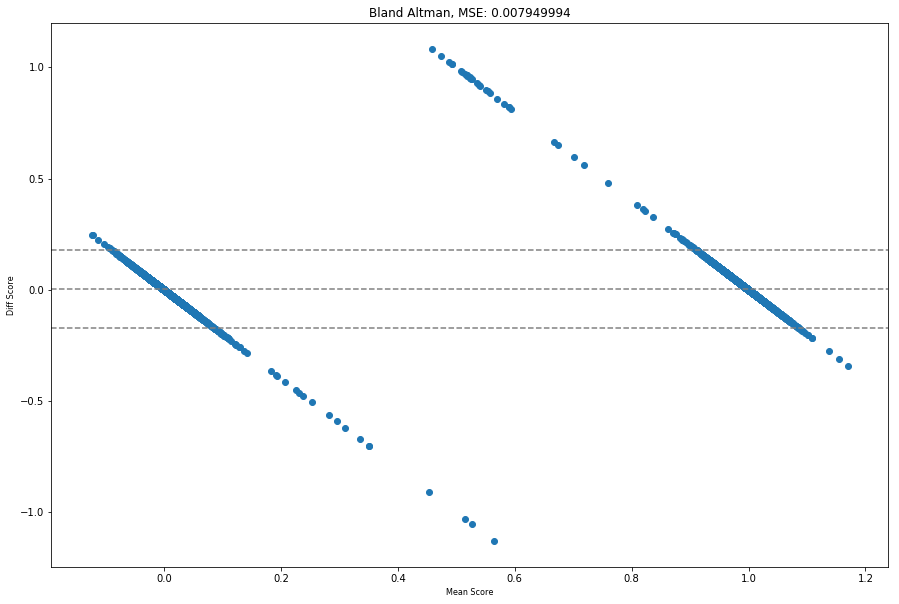

In [12]:
bland_altman_plot(np.concatenate(y_mtl), np.concatenate(yhat_mtl))

In [13]:
from rdkit.ML.Scoring import Scoring

In [61]:
import pandas as pd

scores = {'y_mtl':np.concatenate(y_mtl), 'yhat_mtl':np.concatenate(yhat_mtl)}
df = pd.DataFrame(scores)

In [62]:
print(df)

      y_mtl  yhat_mtl
0     False -0.015739
1     False -0.000854
2     False  0.073338
3     False -0.061676
4     False  0.024977
5     False -0.034893
6     False -0.041767
7     False  0.034397
8     False  0.028851
9     False  0.000678
10    False  0.013192
11    False -0.027791
12    False  0.027597
13    False -0.054388
14    False  0.007950
15    False  0.002804
16    False  0.031637
17    False  0.024716
18    False  0.006665
19    False  0.047736
20    False -0.017767
21    False -0.044926
22    False  0.005741
23    False  0.035408
24    False  0.016307
25    False  0.053533
26    False -0.014041
27    False -0.028972
28    False  0.012528
29    False  0.005724
...     ...       ...
7276  False -0.043012
7277  False  0.047272
7278  False -0.076230
7279  False  0.046460
7280  False  0.012997
7281  False  0.117490
7282  False  0.078480
7283  False -0.086455
7284  False  0.073069
7285  False  0.081990
7286  False -0.016256
7287  False  0.035633
7288  False -0.015238
7289  Fals

In [64]:
score_auc = Scoring.CalcAUC(df.values, 0)
print(score_auc)

0.3569572570198806


In [65]:
score_bedroc = Scoring.CalcBEDROC(df.values, 0, 20)
print(score_bedroc)

0.006959956243419538


In [66]:
score_enrich = Scoring.CalcEnrichment(df.values, 0, [.01, .1, .25, .5])
print(score_enrich)

[0.0, 0.0, 0.21011197387585465, 0.7983050847457627]


In [28]:
print(y_mtl[0].shape)

(406,)


In [36]:
len(y_mtl)

100

In [37]:
from sklearn.metrics import roc_auc_score

In [38]:
s_r = roc_auc_score(y_mtl, yhat_mtl)

ValueError: unknown format is not supported